In [120]:
from sklearn.datasets import load_digits 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import warnings
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
warnings.filterwarnings('ignore')

In [121]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [122]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

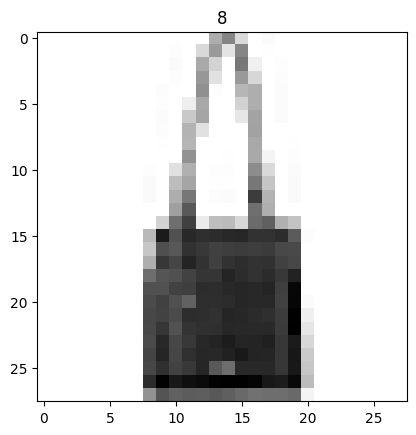

In [123]:
plt.figure()
plt.imshow(train_images[200], cmap = 'gray_r') 
plt.title(train_labels[200])
#plt.colorbar()
plt.grid(False)
plt.show()

In [124]:
train_images = train_images.reshape(-1, 784)
train_images = train_images/train_images.max()

In [131]:
#test_images = test_images.reshape(-1, 784)
#test_images = test_images/test_images.max()

In [125]:
train_labels = to_categorical(train_labels)


In [132]:
test_labels = to_categorical(test_labels)

In [126]:
train_images.shape
train_labels.shape

(60000, 10)

In [133]:
test_images.shape
test_labels.shape

(10000, 10)

In [127]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
# There are 10 classes in the digits data set
model.add(Dense(10, activation='softmax'))

In [128]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [129]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [130]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=50, batch_size=6000)

Epoch 1/50
8/8 [==============================] - 1s 76ms/step - loss: 1.7546 - accuracy: 0.4553 - val_loss: 1.1052 - val_accuracy: 0.6417
Epoch 2/50
8/8 [==============================] - 0s 55ms/step - loss: 0.9082 - accuracy: 0.6951 - val_loss: 0.7349 - val_accuracy: 0.7409
Epoch 3/50
8/8 [==============================] - 0s 64ms/step - loss: 0.6871 - accuracy: 0.7605 - val_loss: 0.6205 - val_accuracy: 0.7850
Epoch 4/50
8/8 [==============================] - 1s 60ms/step - loss: 0.5917 - accuracy: 0.7999 - val_loss: 0.5551 - val_accuracy: 0.8048
Epoch 5/50
8/8 [==============================] - 0s 54ms/step - loss: 0.5334 - accuracy: 0.8185 - val_loss: 0.5127 - val_accuracy: 0.8207
Epoch 6/50
8/8 [==============================] - 0s 57ms/step - loss: 0.4955 - accuracy: 0.8298 - val_loss: 0.4874 - val_accuracy: 0.8282
Epoch 7/50
8/8 [==============================] - 0s 54ms/step - loss: 0.4692 - accuracy: 0.8378 - val_loss: 0.4711 - val_accuracy: 0.8315
Epoch 8/50
8/8 [===========

In [151]:
resul_test = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [152]:
resul_test

array([[5.81633321e-06, 1.07922595e-07, 1.66583834e-06, ...,
        1.15436539e-02, 1.19506447e-04, 9.84360754e-01],
       [3.60739068e-05, 2.41269955e-08, 9.88896132e-01, ...,
        3.31734884e-13, 8.89691080e-07, 2.31239724e-12],
       [6.68359498e-05, 9.99929786e-01, 4.34658091e-07, ...,
        1.55666827e-10, 5.20708774e-08, 2.36208058e-12],
       ...,
       [1.28618220e-03, 8.19568959e-06, 1.06944004e-04, ...,
        8.90244792e-06, 9.97506797e-01, 2.48545295e-10],
       [3.55078237e-06, 9.99676943e-01, 1.86766874e-06, ...,
        3.96297146e-08, 4.25372605e-07, 8.11145640e-09],
       [1.66444806e-04, 2.96688104e-05, 1.21206132e-04, ...,
        1.55353490e-02, 1.09891361e-03, 1.03552644e-04]], dtype=float32)

In [153]:


img_predict =resul_test[30]
print(img_predict)

[7.1123052e-11 2.8888550e-10 1.2935664e-10 1.4896845e-09 8.4968207e-08
 9.5679836e-12 1.6571073e-11 1.2178041e-09 9.9999988e-01 6.4502630e-14]


In [154]:
print(np.argmax(img_predict))

8


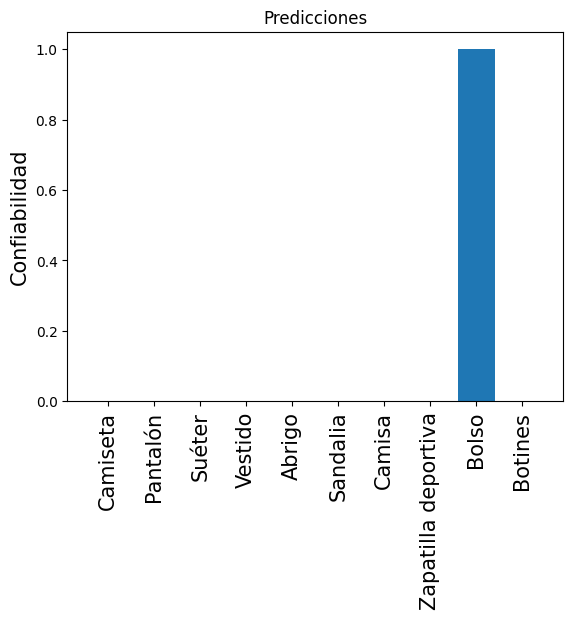

In [155]:
index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

TypeError: Invalid shape (784,) for image data

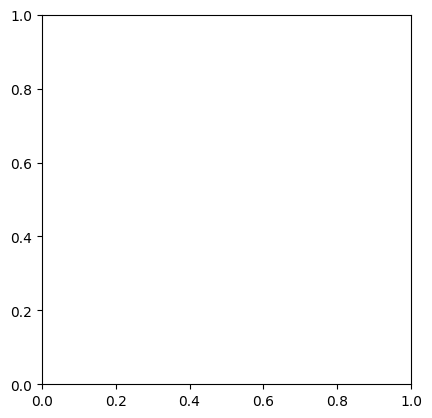

In [156]:
plt.figure()
plt.imshow(test_images[30])
plt.colorbar()
plt.grid(False)
plt.show()